In [1]:
import numpy as np
np.random.seed(1000)
import cv2
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
os.environ["KERAS_BACKEND"]= "tensorflow"
from keras.utils import to_categorical
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [2]:
img_dir="cell_images/"
Size=64
dataset= []
label= []

parasitized_images= os.listdir(img_dir + "Parasitized/")
for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1]=="png"):
        image=cv2.imread(img_dir + "Parasitized/" + image_name)
        image= Image.fromarray(image, 'RGB')
        image= image.resize((Size, Size))
        image= np.asarray(image) / 255
        dataset.append(np.array(image))
        label.append(0)
        
uninfected_images= os.listdir(img_dir + "Uninfected/")
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1]=="png"):
        image=cv2.imread(img_dir + "Uninfected/" + image_name)
        image= Image.fromarray(image, 'RGB')
        image= image.resize((Size, Size))
        image=np.asarray(image) / 255.0
        dataset.append(np.array(image))
        label.append(1)


In [3]:
np.shape(dataset)

(27558, 64, 64, 3)

In [4]:
np.shape(label)

(27558,)

In [5]:
np.array(label)

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
np.array(dataset)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [7]:
#### define the model
input_shape= (Size, Size, 3)
inputs= keras.layers.Input(shape=input_shape)

x= keras.layers.Conv2D(32, 3, activation="relu", padding="same")(inputs)
x= keras.layers.Conv2D(32, 3, activation="relu", padding="same")(x)
x= keras.layers.MaxPooling2D((2,2))(x)
x= keras.layers.BatchNormalization()(x)
x= keras.layers.Dropout(0.2)(x)


x= keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x= keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x= keras.layers.MaxPooling2D((2,2))(x)
x= keras.layers.BatchNormalization()(x)
x= keras.layers.Dropout(0.2)(x)


x= keras.layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x= keras.layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x= keras.layers.MaxPooling2D((2,2))(x)
x= keras.layers.BatchNormalization()(x)
x= keras.layers.Dropout(0.2)(x)

x= keras.layers.Flatten()(x)

x=keras.layers.Dense(1024, activation="relu")(x)
x= keras.layers.BatchNormalization()(x)
x= keras.layers.Dropout(0.2)(x)


x=keras.layers.Dense(1024, activation="relu")(x)
x= keras.layers.BatchNormalization()(x)
x= keras.layers.Dropout(0.2)(x)

out= keras.layers.Dense(2, activation="sigmoid")(x)

model=keras.Model(inputs=inputs, outputs=out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0     

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size=0.2, random_state=42)

In [23]:
y_test.shape


(5512, 2)

In [11]:
history= model.fit(np.array(X_train), y_train, batch_size=128, verbose=1, epochs=40,
                  validation_split=0.1)

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))


Epoch 1/40
156/156 [==============================] - 108s 677ms/step - loss: 0.6023 - accuracy: 0.7629 - val_loss: 2.7401 - val_accuracy: 0.5029
Epoch 2/40
156/156 [==============================] - 108s 691ms/step - loss: 0.1580 - accuracy: 0.9444 - val_loss: 2.2472 - val_accuracy: 0.5048
Epoch 3/40
156/156 [==============================] - 118s 757ms/step - loss: 0.1328 - accuracy: 0.9538 - val_loss: 0.5893 - val_accuracy: 0.8322
Epoch 4/40
156/156 [==============================] - 113s 724ms/step - loss: 0.1204 - accuracy: 0.9586 - val_loss: 0.2081 - val_accuracy: 0.9306
Epoch 5/40
156/156 [==============================] - 114s 733ms/step - loss: 0.1154 - accuracy: 0.9594 - val_loss: 0.1323 - val_accuracy: 0.9596
Epoch 6/40
156/156 [==============================] - 119s 763ms/step - loss: 0.1114 - accuracy: 0.9601 - val_loss: 0.1417 - val_accuracy: 0.9429
Epoch 7/40
156/156 [==============================] - 116s 743ms/step - loss: 0.1045 - accuracy: 0.9641 - val_loss: 0.2038 -

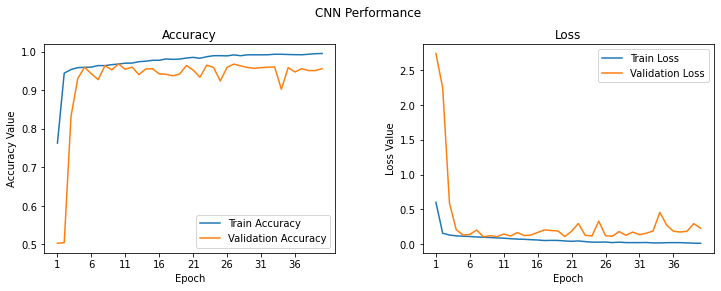

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [14]:
model.save('malaria_cnn.h5')


In [75]:
loaded_model = tf.keras.models.load_model('malaria_cnn.h5')


1/1 [==============================] - 0s 16ms/step
The prediction for this image is:  [[0.9854582  0.00174201]]
The actual label for this image is:  [1. 0.]


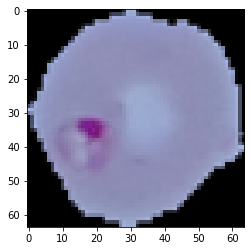

In [27]:
n=24  #Select the index of image to be loaded for testing
img = np.array(X_test[n])
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [22]:
_, acc = model.evaluate(np.array(X_test), y_test)
print("Accuracy = ", (acc * 100.0), "%")

173/173 [==============================] - 7s 43ms/step - loss: 0.3078 - accuracy: 0.9536
Accuracy =  95.35558819770813 %


In [30]:
y_pred = (model.predict(np.array(X_test))>= mythreshold).astype(int)

173/173 [==============================] - 6s 34ms/step


In [35]:
y_pred

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [41]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [54]:
mythreshold=0.5
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(np.array(X_test))>= mythreshold).astype(int)
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))  
print(cm)

173/173 [==============================] - 13s 78ms/step
[[2613  184]
 [  70 2645]]


173/173 [==============================] - 12s 72ms/step


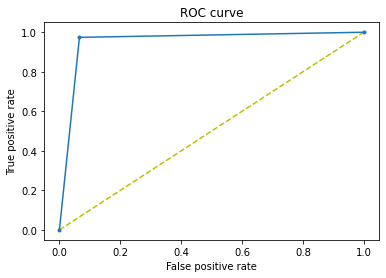

In [50]:
from sklearn.metrics import roc_curve
y_preds = model.predict(np.array(X_test))

fpr, tpr, thresholds = roc_curve(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [51]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  1    1
Name: thresholds, dtype: int64


In [52]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9542162709190523
